---
### Description
---
* Goal: Implement a Convolutional Neural Network (CNN) classifier in Python with the PyTorch framework
* To implement this homework successfully, you need to understand how a CNN works, including:
  * Backpropagation
  * Gradient descent in order to implement this homework successfully

---
### Resources
----
* Dataset: CIFAR-10
* Packages: PyTorch, NumPy, THOP (for MACs and Total Weights/Parameters Counting)
* OpenCV (for reading images)
* Classifier: Softmax

---
### Requirements
---
* (✓) Training function
  * (✓) Will train the model with the command "python CNNclassify.py train"
  * (✓) Store the training accuracy and testing accuracy at the end of each training epoch in a list or something else
* (✓) Loss-Curve Plot
  * (✓) Utilize Matplotlib to draw the plot
  * (✓) At the end of the entire training
  * (✓) A single plot that contains the two curves (training and test accuracy) that shows the trend of accuracy during training
  * (✓) X-axis: the number of training epochs
  * (✓) Y-axis: the accuracy
  * (✓) The two curves should have different colors
  * (✓) A legend should be shown in the plot
  * This should only be done for one training process, so no need to do this for different seeds
* (✓) Testing Function
  * (✓) Will test the model with the command "python CNNclassify.py test xxx.png"
  * (✓) Load it from the folder "model" created in the training step
  * (✓) Should read the image "xxx.png" and...
    * (✓) Predict the output as shown in figure 2
    * (✓) Visualize the output of the first convolution layer in the trained model for each filter (i.e. 32 visualization squares) and save the visualization results as "CONV_rslt.png" as shown in figure 3
  * (✓) The testing result should match the true image class when the classifier achieves a high accuracy
  * You should provide your own testing image and submit the image together with your code.
* Implement another testing function
  * Should accept the command "python CNNclassify.py resnet20"
  * Should load a pretrained ResNet-20 model and test the accuracy of this model using the entire CIFAR-10 testing dataset
  * When you test this model, use the same data augmentation (normalization) as used for training
    * This data augmentation has been provided in a seperate file
* (✓) Save the model in a folder named "model" after training process finishes
* (✓) Show the testing accuracy in each epoch of the training function
* Final testing accuracy should be >= 75% in the end with CIFAR-10 dataset
* (✓) Model Specifications
  * (✓) Optimization techniques such as mini-batch, batch normilation, dropout, and regularization may be used
  * (✓) Requirement: 1st Convolution Layer ONLY
    * (✓) Filter (F) = 5x5
    * (✓) Stride (S) = 1
    * (✓) 0 Padding (P) = 0
    * (✓) Number of filters (K) = 32
  * (✓) You can add as many convolution layers as you want
    * (✓) Keep in mind however, that more convolution layers results in higher training process + larger computation cost
    * (✓) Other convolution layers can vary
  * (✓) You can add as many fully-connected layers as you want
    * (✓)Enhances the model accuracy
    * (✓) There is no limitation for the size of the fully connected layers
* Random Seeds
  * (✓) Manually set the random seed for your model training process
  * Train your network 3 times using different seeds
* PDF Report
  * (✓) Show the 3 random seeds used for the training
  * (✓) Show the corresponding accuracies of the trained model for the different seeds
  * (✓) Report the mean of the 3 accuracies
  * (✓) Report the standard deviation of the 3 accuracies
    * (✓) You may use numpy.std() to calculate the standard deviaation
* THOP
  * (✓) Utilize this package to count the computation cost in MACs and the number of parameters of your neural network
  * Utilize this package to count the computation cost in MACs and the number of parameters of ResNet-20 model too
  * THOP documentation (https://pypi.org/project/thop/)
* inference_speed_test(args) function
  * Tests the model infernece speed of your own modle and the ResNet-20 model
  * The infernece time should be measured based on a single input, not a batch
    * You can use either dummy input or the real image as the input
  * You should run several warmup iterations before measuring the time
  * You should run multiple inference iterations (e.g., 100 or 1000) and measure the overall runtime
    * Calculate teh average time as your final infernece time

---
### Submission
---
* A Python File "CNNclassify.py"
* A Generated Model Folder: "model"
* A Report (PDF)
  * Your Code
  * 2 Screenshots of training and testing results of your neural network design
  * 1 Screenshot of the visualization results from the first CONV layer
  * 1 Screenshot showing the test accuracy of ResNet-20 model on the entire CIFAR-10 testing dataset
  * 1 Screenshot of the plot that shows the curves of the training and testing accuracy
  * 1 Screenshot of the computation costs (MACs) and number of parameters of your Neural Network and ResNet-20 counted by using the THOP package
  * Show the 3 random seeds used for your training and..
    * Their final accuracies
    * Their means
    * Thier standard deviations
  * Show the inference time of your own model and ResNet-20 model respectively

---
### Submission Specifications
---
* CNNclassify.py should be able to run with the following commands
  * python CNNclassify.py train
    * Trains your neural network classifer
    * Generates a model in the model folder
  * python CNNclassify.py test xxx.png
    * Predicts the class of an image and displays the prediction result in a 'test function'
    * Saves the visualization results from the first convolution layer as "CONV_rslt.png" in a 'visualization function'
  * python CNNclassify.py resnet20
    * tests the accuracy of a pretrained ResNet-20 model of CIFAR-10 testing dataset
  * zip file naming convention
    * <Last-Name>_<First-Name>_HW2.zip
  * Notes
    * Do not put any print function other than showing the results
    * Comment your code
    * Do not include the CIFAR dataset in your submission
    * Testing accuracy should be >= 75% in the end

In [1]:
'''Import standard data sceince libraries'''
import os # used for file handling
import sys # used for system specific parameters
from matplotlib import pyplot as plt # used for plotting graphs
import numpy as np # used for numerical computing
from thop import profile # used to get the model flops
import time # used to get the time

'''Import image processing libraries'''
from PIL import Image # used for image processing

'''Import Torch Libraries'''
import torch # Pytorch
import torchvision # Pytorch Vision
import torchvision.datasets as datasets # import the datasets from torchvision for training and testing
import torchvision.transforms as transforms # used for transforming image
import torch.nn as nn # Pytorch Neural Network class
import torch.optim as optim # Pytorch Optimizer
from torchsummary import summary # used to get the model summary

'''Import warnings module to ignore warnings'''
import warnings # used to ignore warnings
warnings.filterwarnings('ignore') # ignore warnings

/Users/swapnilroy/miniconda3/envs/info2000/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/swapnilroy/miniconda3/envs/info2000/lib/python3.10/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c1017RegisterOperatorsD1Ev
  Referenced from: <5AA8DD3D-A2CC-31CA-8060-88B4E9C18B09> /Users/swapnilroy/miniconda3/envs/info2000/lib/python3.10/site-packages/torchvision/image.so
  Expected in:     <8B7B82B6-E557-3363-B7AC-84C29F398EBA> /Users/swapnilroy/miniconda3/envs/info2000/lib/python3.10/site-packages/torch/lib/libtorch_cpu.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [2]:
'''
* Random Seeds
    * Manually set the random seed for your model training process
    * Train your network 3 times using different seeds
'''
torch.manual_seed(42) # so that weights are always initialized to some particular random value

In [3]:
'''
Check if CPU or GPU is available
'''
device = 'cuda' if torch.cuda.is_available() else 'cpu' # set the device to GPU is available else CPU

In [4]:
'''
Create a folder for saved models if it doesn't exist
'''
if not os.path.exists('model'): # if the folder doesn't exist
    os.makedirs('model') # create the folder

In [5]:
'''
Specify transforms using torchvision.transforms as transforms
    # One of the methods of normalizing the data from the world of statistics is (x - x.mean()) / x.std()) (F-score)
'''

train_transformations = transforms.Compose([ # compose is used to chain multiple transformations together
    transforms.ToTensor(), # convert the image to a tensor
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010]) # normalize the image
]) # the mean and standard deviation values are the values for the CIFAR-10 dataset

test_transformations = transforms.Compose([ # compose is used to chain multiple transformations together
    transforms.ToTensor(), # convert the image to a tensor
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010]) # Nnrmalize the image
]) # the mean and standard deviation values are the values for the CIFAR-10 dataset

In [6]:
'''----------------- prepare training data -----------------------'''
train_set = datasets.CIFAR10(
    root='./data.cifar10',                          # location of the dataset
    train=True,                                     # this is training data
    transform=train_transformations,                # converts a PIL.Image or numpy.ndarray to torch.FloatTensor of shape (H x W x Channels)
    download=True                                   # if you haven't had the dataset, this will automatically download it for you
) # CIFAR-10 dataset (60,000 32x32 colour images in 10 classes, with 6,000 images per class

'''----------------- prepare testing data -----------------------'''
test_set = datasets.CIFAR10(
    root='./data.cifar10/',                         # location of the dataset
    train=False,                                    # this is testing data
    transform=test_transformations,                 # converts a PIL.Image or numpy.ndarray to torch.FloatTensor of shape (H x W x Channels)
) # CIFAR-10 dataset (60,000 32x32 colour images in 10 classes, with 6,000 images per class
print(f"\nClasses in data:\n{train_set.classes}\n") # print the classes in the train set
print(f"Length of Test Set: {len(test_set)}") # print the length of the test set

Files already downloaded and verified

Classes in data:
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Length of Test Set: 10000


In [7]:
'''
Load datasets into Dataloader using torch library
'''
train_loader = torch.utils.data.DataLoader(train_set, batch_size=64,shuffle=True) # load the training data
test_loader = torch.utils.data.DataLoader(test_set, batch_size =64,shuffle=False) # load the testing data

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


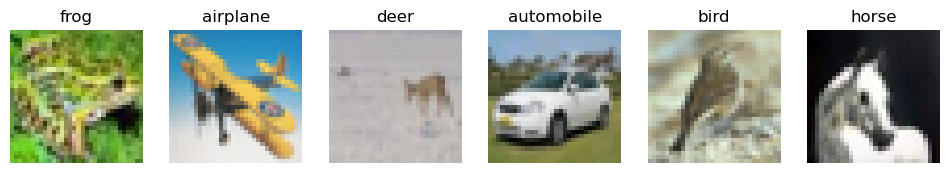

In [8]:
'''
Display some images using subplots
'''
data_iter = iter(train_loader) # create an iterator object from the train_loader
images, labels = next(data_iter) # get the next batch of images and labels

'''
Function to unnormalize and convert images using NumPy
'''
def unnormalize(img):
    mean = torch.tensor([0.4914, 0.4822, 0.4465]).view(3,1,1) # view is used to reshape the tensor
    std = torch.tensor([0.2023, 0.1994, 0.2010]).view(3,1,1) # view is used to reshape the tensor
    return img * std + mean # unnormalize the image
'''
Unnormalize the images
'''
images = unnormalize(images)  # Unnormalize
images = images.numpy().transpose(0, 2, 3, 1)  # convert from (C, H, W) to (H, W, C)
classes = train_set.classes # get the classes


'''
Display the images
'''
fig, axes = plt.subplots(1, 6, figsize=(12, 6)) # create a figure and a set of subplots
for idx, ax in enumerate(axes): # iterate through the axes
    ax.imshow(images[idx]) # display the image
    ax.set_title(classes[labels[idx]]) # set the title of the image
    ax.axis("off") # turn off the axis

plt.show() # display the plot

In [9]:
'''
Check if the mini batch is being loaded everytime we call train loader
    # Should be 32x32x3 images with batch size of 64 images
'''
for l in range(2):
    img,lab = next(iter(train_loader)) # get the next batch of images and labels
    print(img.size(), lab.size()) # print the size of the images and labels

torch.Size([64, 3, 32, 32]) torch.Size([64])
torch.Size([64, 3, 32, 32]) torch.Size([64])


In [10]:
'''
----------------- Build the Model ------------------------
* Model Specifications
  * Optimization techniques such as mini-batch, batch normilation, dropout, and regularization may be used
  * Requirement: 1st Convolution Layer ONLY
    * Filter (F) = 5x5
    * Stride (S) = 1
    * 0 Padding (P) = 0
    * Number of filters (K) = 32
  * You can add as many convolution layers as you want
    * Keep in mind however, that more convolution layers results in higher training process + larger computation cost
    * Other convolution layers can vary
  * You can add as many fully-connected layers as you want
    * Enhances the model accuracy
    * There is no limitation for the size of the fully connected layers
  * Final testing accuracy should be >= 75% in the end with CIFAR-10 dataset
'''
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        # First Convolution Layer (As per assignment specification)
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=5, stride=1, padding=0)  # 5x5x32 filter Convolution Layer
        self.bn1 = nn.BatchNorm2d(num_features=32)  # 32 Batch Normalization
        self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride=2)  # 2x2 Max Pooling

        # Additional Convolutional Layers (Assignment allows more)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)  # 3x3x64 filter Convolution Layer
        self.bn2 = nn.BatchNorm2d(num_features=64) # 64 Batch Normalization
        
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1) # 3x3x128 filter Convolution Layer
        self.bn3 = nn.BatchNorm2d(num_features=128) # 128 Batch Normalization
        self.maxpool2 = nn.MaxPool2d(kernel_size=2, stride=2) # 2x2 Max Pooling

        # Fully Connected Layers
        self.fc1 = nn.Linear(in_features=7*7*128, out_features=512)  # 6272 input layer; k = 512 output layer
        # (7x7x128) before flattening --> 6272 (after flattening) --> 512 output neurons

        self.drop1 = nn.Dropout(p=0.3) # Dropout Layer
        self.fc2 = nn.Linear(in_features=512, out_features=256)  # 512 output neurons; k = 256 output layer
        self.drop2 = nn.Dropout(p=0.3) # Dropout Layer
        self.fc3 = nn.Linear(in_features=256, out_features=10)  # 256 output neurons; k = 10 output layer

        # ReLU Activation Function
        self.relu = nn.ReLU() # ReLU Activation Function

    '''
    My Model: 
    1) Conv --> Batch Normalization --> ReLU --> Max
    2) Conv --> Batch Normalization --> ReLUs
    3) Conv --> Batch Normalization --> ReLU --> Max
    4) Flatten
    5) Fully Connected Layer --> ReLU --> Dropout
    6) Fully Connected Layer --> ReLU --> Dropout
    7) Fully Connected Layer
    '''
    def forward(self, x):
        # Conv1 -> BN -> ReLU -> MaxPool
        x = self.conv1(x) # (32 - 5 + 2*0)/1 + 1 = 28x28x32 output layer
        x = self.bn1(x) # 28x28x32
        x = self.relu(x) # ReLU Activation Function
        x = self.maxpool1(x) # (28 - 2)/2 + 1 = 14x14x32 output layer

        # Conv2 -> BN -> ReLU
        x = self.conv2(x) # (14 - 3 + 2*1)/1 + 1 = 14x14x64 output layer
        x = self.bn2(x) # 14x14x64
        x = self.relu(x) # ReLU Activation Function

        # Conv3 -> BN -> ReLU -> MaxPool
        x = self.conv3(x) # (14 - 3 + 2*1)/1 + 1 = 14x14x128 output layer
        x = self.bn3(x) # 14x14x128
        x = self.relu(x) # ReLU Activation Function
        x = self.maxpool2(x) # (14 - 2)/2 + 1 = 7x7x128 output layer

        x = x.view(x.size(0), -1)  # Flatten the output for the Fully Connected Layer

        # FC1 -> ReLU -> Dropout
        x = self.fc1(x) # (7 - 7 + 2*0)/1 + 1 = 1x1x512 output layer
        x = self.relu(x) # ReLU Activation Function
        x = self.drop1(x) # 0.3 Dropout

        # FC2 -> ReLU -> Dropout
        x = self.fc2(x) # (1 - 1 + 2*0)/1 + 1 = 1x1x256 output layer
        x = self.relu(x) # ReLU Activation Function
        x = self.drop2(x) # 0.3 Dropout

        # FC3
        x = self.fc3(x) # (1 - 1 + 2*0)/1 + 1 = 1x1x10 output layer (10 classes)
        return x

In [11]:
'''
Model Summary: Tells you how you built the model:
    * the number of parameters in the model
    * the weights in every convolutional layer that need to get trained in the fully connected layers
    * tells use that there are 6.58 million weights that need to be trained when we train the model
'''
model = CNN().to(device) # Create an instance of the model and send it to the device
summary(model, input_size=(3, 32, 32)) # Print the model summary

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]           2,432
       BatchNorm2d-2           [-1, 32, 28, 28]              64
              ReLU-3           [-1, 32, 28, 28]               0
         MaxPool2d-4           [-1, 32, 14, 14]               0
            Conv2d-5           [-1, 64, 14, 14]          18,496
       BatchNorm2d-6           [-1, 64, 14, 14]             128
              ReLU-7           [-1, 64, 14, 14]               0
            Conv2d-8          [-1, 128, 14, 14]          73,856
       BatchNorm2d-9          [-1, 128, 14, 14]             256
             ReLU-10          [-1, 128, 14, 14]               0
        MaxPool2d-11            [-1, 128, 7, 7]               0
           Linear-12                  [-1, 512]       3,211,776
             ReLU-13                  [-1, 512]               0
          Dropout-14                  [

In [14]:
n_epoch = 20 # number of epochs
lr = 0.001 # Learning rate
optimizer = optim.Adam(model.parameters(),lr = lr) # Adam optimizer is used
loss_fn = nn.CrossEntropyLoss() # CrossEntropyLoss is used for multi-class classification as a loss function   

In [15]:
'''
Containers for storing data
'''

train_correct = 0 # number of correct predictions in training set
train_samples = 0 # number of samples in training set
test_correct = 0 # number of correct predictions in testing set
test_samples = 0 # number of samples in testing set

train_losses = [] # list to store training losses
test_losses = [] # list to store testing losses

In [16]:
# ----------------- Main Training Loop -----------------------
train_acc_list = []
test_acc_list = []

for epoch in range(n_epoch):  
    model.train()
    running_loss = 0.0
    train_correct = 0
    train_samples = 0

    for X, y in train_loader:
        X, y = X.to(device), y.to(device)  
        optimizer.zero_grad()
        y_pred = model(X)  
        loss = loss_fn(y_pred, y)  
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(y_pred, 1)
        train_correct += (predicted == y).sum().item()
        train_samples += y.size(0)

    model.eval()
    test_loss = 0.0
    test_correct = 0
    test_samples = 0

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)  
            outputs = model(images)  
            loss_val = loss_fn(outputs, labels)  
            test_loss += loss_val.item()  
            _, predicted = torch.max(outputs, 1)  
            test_correct += (predicted == labels).sum().item()
            test_samples += labels.size(0)

    # Compute averages
    train_loss = running_loss / len(train_loader)
    test_loss = test_loss / len(test_loader)
    train_accuracy = 100 * train_correct / train_samples
    test_accuracy = 100 * test_correct / test_samples

    # Store results for plotting later
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    train_acc_list.append(train_accuracy)
    test_acc_list.append(test_accuracy)

    print(f"Epoch: {epoch+1} Train Loss: {train_loss:.3f} Train Accuracy: {train_accuracy:.2f}% " +
            f"Test Loss: {test_loss:.3f} Test Accuracy: {test_accuracy:.2f}%")

KeyboardInterrupt: 

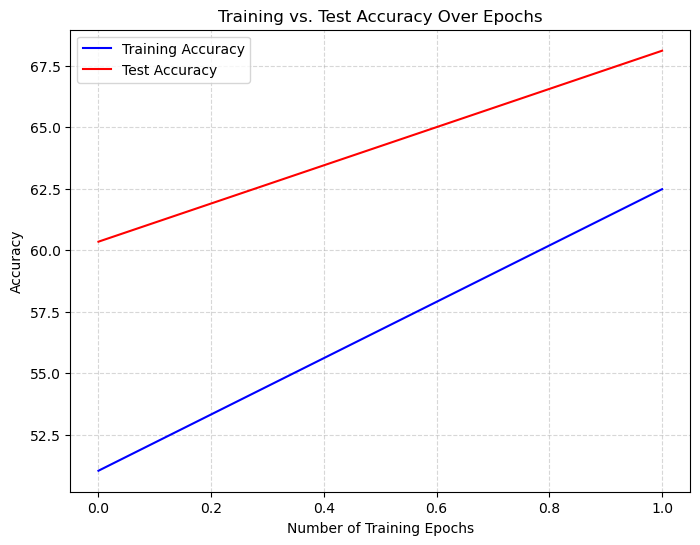

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [42]:
'''
Loss curve plotting
'''

ep = list(range(n_epoch))  # X-axis

plt.figure(figsize=(8, 6)) # set figure size
    
plt.plot(ep, train_acc_list, label='Training Accuracy', color='blue', linestyle='-')  # plot training accuracy
plt.plot(ep, test_acc_list, label="Test Accuracy", color='red', linestyle='-')

plt.xlabel("Number of Training Epochs") # set x-axis label
plt.ylabel("Accuracy") # set y-axis label
plt.title("Training vs. Test Accuracy Over Epochs") # set title

plt.legend() # show legend
plt.grid(True, linestyle="--", alpha=0.5) # show grid
plt.show() # display the plot

plt.figure(figsize=(8, 6))  # Set figure size

In [15]:
'''
Save the model to a folder 'model' named 'cnn_model_42.pt'
'''
torch.save(model.state_dict(), "./model/cnn_model_42.pt")

In [43]:
'''
Load the model from the 'model' folder.
'''
model_path = "./model/cnn_model_42.pt"
if os.path.exists(model_path):
    model.load_state_dict(torch.load(model_path, map_location=device))
    model.eval()

prediction result: airplane


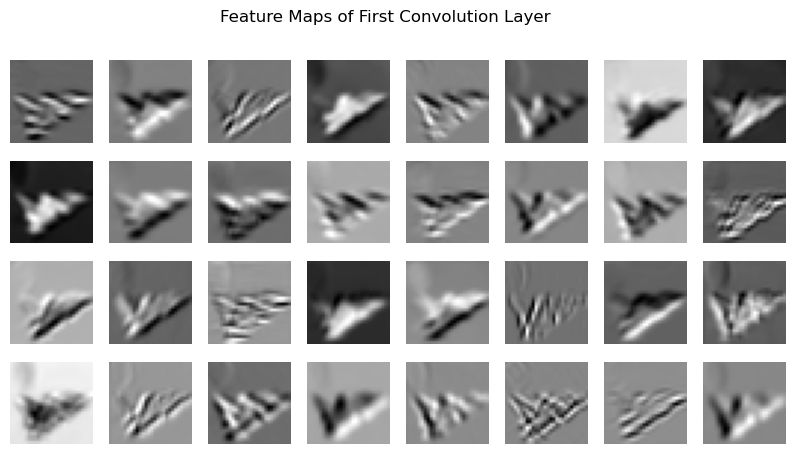

In [54]:
"""Load a single image and predict its class."""
# CIFAR-10 classes dictionary
classes = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'
}

# Create transformation (resize to 32x32, convert to tensor, normalize)
transformation_new = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465],
                            std=[0.2023, 0.1994, 0.2010])
])

image_path = 'airplane5.png'

try:
    image = Image.open(image_path).convert('RGB')
except Exception as e:
    print("Error opening image:", e)
    sys.exit(1)

image_tensor = transformation_new(image).unsqueeze(0).to(device) # add batch dimension
model.eval() # set model to evaluation mode
with torch.no_grad(): # turn off gradient tracking
    output = model(image_tensor) # forward pass
    _, predicted = torch.max(output, 1) # get predicted class index
print(f"prediction result: {classes[predicted.item()]}") # print the predicted class

# ----------------- Feature Map Visualization -----------------
model.eval() # set model to evaluation mode
with torch.no_grad(): # turn off gradient tracking
    first_conv_layer = model.conv1  # forward pass through first convolutional layer
    feature_maps = first_conv_layer(image_tensor) # Get the feature maps
feature_maps = feature_maps.cpu().squeeze(0).detach().numpy()  # move to CPU and detach from graph

# -------------------- Visualization --------------------
fig, axes = plt.subplots(4, 8, figsize=(10, 5))  # 4x8 grid (since there are 32 filters)
for i, ax in enumerate(axes.flat): # iterate through the axes
    if i < feature_maps.shape[0]:  # ensure index is within range
        ax.imshow(feature_maps[i], cmap="gray")  # show each feature map
        ax.axis("off") # Ttrn off axis
    else: # hide unused subplots
        ax.set_visible(False)  # hide unused subplots

plt.suptitle("Feature Maps of First Convolution Layer", fontsize=12) # set title
plt.savefig("CONV_rslt.png")  # save the figure
plt.show() # display the plot

In [61]:
# Compute Mean and Standard Deviation
train_mean = np.mean(train_acc_list)
train_std = np.std(train_acc_list)
test_mean = np.mean(test_acc_list)
test_std = np.std(test_acc_list)

# Print results
print(f"Train Accuracy Mean: {train_mean:.2f}% | Std Dev: {train_std:.2f}%")
print(f"Test Accuracy Mean: {test_mean:.2f}% | Std Dev: {test_std:.2f}%")

Train Accuracy Mean: 56.76% | Std Dev: 5.72%
Test Accuracy Mean: 64.23% | Std Dev: 3.88%


In [64]:
# Ensure model is in evaluation mode
model.eval()

# Create a dummy input matching CIFAR-10 (batch=1, channels=3, height=32, width=32)
dummy_input = torch.randn(1, 3, 32, 32).to(device)

# Compute MACs and number of parameters using THOP
with torch.no_grad():  # Prevent unnecessary gradients
    macs, params = profile(model, inputs=(dummy_input,))

# Print results
print(f"MACs (Multiply-Accumulate Operations): {macs / 1e6:.2f}M")
print(f"Number of Parameters: {params / 1e6:.2f}M")

[INFO] Register count_convNd() for <class 'torch.nn.modules.conv.Conv2d'>.
[INFO] Register count_normalization() for <class 'torch.nn.modules.batchnorm.BatchNorm2d'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.pooling.MaxPool2d'>.
[INFO] Register count_linear() for <class 'torch.nn.modules.linear.Linear'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.dropout.Dropout'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.activation.ReLU'>.
MACs (Multiply-Accumulate Operations): 23.54M
Number of Parameters: 3.44M


In [67]:
from resnet20_cifar import resnet20


# This resnet20 model is trained with Normalization augmentation for training data:
# transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
# Therefore, you need to test this model also using the same Normalization for your testing data
# As a result, you need to add the above transforms.Normalize(xxxx) in your testing data loader.



model = resnet20()
model_path = "./resnet20_cifar10_pretrained.pt"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.load_state_dict(torch.load(model_path, map_location=device))

# Move model to the correct device
model.to(device)

ResNet(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=Fals

In [68]:
"""Test the pre-trained ResNet-20 model on the CIFAR-10 test set."""
model = resnet20().to(device)  # Load ResNet-20
model_path = "./resnet20_cifar10_pretrained.pt"
model.load_state_dict(torch.load(model_path, map_location=device))
model.eval()

test_correct = 0
test_samples = 0
test_loss = 0.0
loss_fn = nn.CrossEntropyLoss()  # Loss function

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss_val = loss_fn(outputs, labels)
        test_loss += loss_val.item()
        _, predicted = torch.max(outputs, 1)
        test_correct += (predicted == labels).sum().item()
        test_samples += labels.size(0)

test_accuracy = 100 * test_correct / test_samples
print(f"ResNet-20 Test Accuracy: {test_accuracy:.2f}%")

ResNet-20 Test Accuracy: 92.05%


In [71]:
"""
Measure the inference speed of a model.
"""
num_iterations = 1000  # Number of iterations for measuring inference speed
model.eval()
dummy_input = torch.randn(1, 3, 32, 32).to(device)

# Warm-up iterations
for _ in range(10):
    _ = model(dummy_input)

# Measure inference time
start_time = time.time()
for _ in range(num_iterations):
    _ = model(dummy_input)
total_time = time.time() - start_time

avg_time_per_inference = total_time / num_iterations
print(f"Average Inference Time: {avg_time_per_inference:.6f} seconds")

Average Inference Time: 0.002279 seconds
